In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

### Wave file load

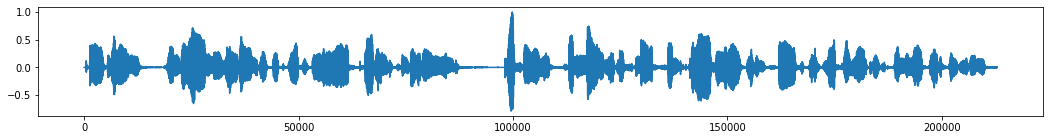

In [9]:
# 첫번째 파일 로드
wav, sampling_rate = librosa.core.load('LJ001-0001.wav')
# normalizing
wav /= max(abs(wav))

plt.figure(figsize=[18, 2])
plt.plot(wav)
plt.show()

# 22050 hz 음성파일을 11025 hz로 재생하면 어떤소리가 날까요?
# 1. 소리가 높게난다.
# 2. 소리가 낮게난다.
# 3. 소리 길이가 늘어난다.
# 4. 소리 길이가 짧아진다.
import IPython.display as ipd
ipd.Audio(wav, rate=22050)

### Spectrogram

In [7]:
# spectrogram과 mel-spectrogram 값을 normalizing하기 위한 함수
# 참고한 방법 : https://github.com/keithito/tacotron/blob/master/util/audio.py
# Tacotron, Wavenet등 같은 모델이라도 구현한 사람마다 normalize하는 방법이 다름.
def normalize(S):
    return (20 * np.log10(S + 1e-5) + 100) / 120

(1025, 416)


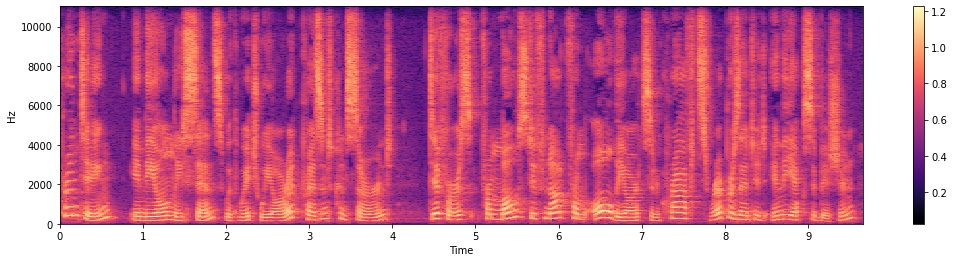

In [10]:
# spectrogram 구하기
# hop_length : CNN구조에서 stride 정확하게 같은일을 합니다.
# n_fft : filter size
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)
spec = np.abs(spec)

plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time', hop_length=512)
plt.colorbar()
plt.show()

import IPython.display as ipd
ipd.Audio(wav, rate=22050)

### Spectrogram 값  보기  

In [11]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)
print(spec)

(1025, 416)
[[ 1.45897502e-02+0.00000000e+00j  1.05911810e-02+0.00000000e+00j
  -1.17969541e-02+0.00000000e+00j ... -2.97337933e-03+0.00000000e+00j
  -1.42600434e-03+0.00000000e+00j  4.62552067e-03+0.00000000e+00j]
 [-2.23632529e-03-1.21108771e-17j -1.38522638e-02-3.73217254e-03j
   9.23244655e-03-1.83021631e-02j ...  1.41021318e-03+9.70301393e-04j
   1.25106238e-03+2.09561345e-04j -1.16718223e-03+6.53517433e-03j]
 [-1.06485933e-02-1.70541944e-17j  1.36906235e-02-2.13744584e-03j
  -4.62151039e-03+9.56814550e-03j ...  7.90693739e-04-1.17973727e-03j
   6.39168313e-04+2.63367489e-04j -6.69547450e-03-2.80269608e-03j]
 ...
 [ 3.62874962e-05-1.91039480e-17j -1.22370446e-04+2.39947418e-04j
   4.50481457e-05-3.02870263e-04j ... -6.72351089e-05-1.37795447e-04j
   4.76786081e-05+4.04347920e-05j -3.59280180e-04+1.92081032e-04j]
 [-8.06497192e-05+4.55534319e-18j -2.32533450e-04-1.65450663e-04j
  -2.82505120e-04+1.91485757e-04j ...  9.28907830e-05+2.64172122e-04j
   2.75772967e-04+1.03179096e-04j  

### n_fft와 hop_length 바꿔보기

In [6]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=1024, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=4096, hop_length=256)
print(spec.shape)

(1025, 832)
(513, 832)
(2049, 832)


In [7]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=2048, hop_length=1024)
print(spec.shape)

(1025, 832)
(1025, 416)
(1025, 208)


### Mel-spectrogram

mel matrix shape : (80, 1025)


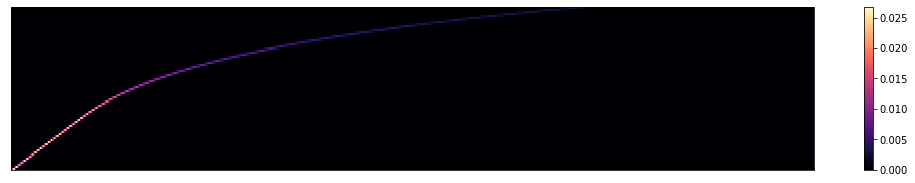

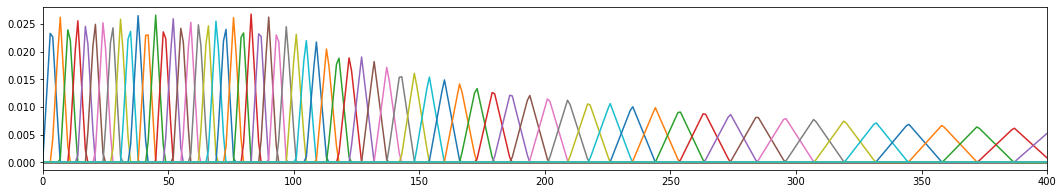

In [16]:
# mel-spectrogram을 만들기 위한 matrix 구하기
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
print('mel matrix shape :', mel_matrix.shape)

# mel matrix 시각화1
plt.figure(figsize=[18, 3])
librosa.display.specshow(mel_matrix)
plt.colorbar()
plt.show()

# mel matrix 시각화2
plt.figure(figsize=[18, 3])
for i in range(80):
    plt.plot(mel_matrix[i])
    plt.xlim([0, 400])
plt.show()

mel-spectrogram shape: (80, 416)


/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


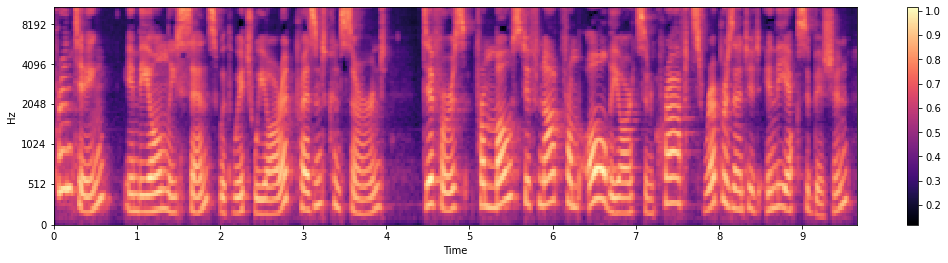

In [14]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
spec = np.abs(spec)

# spec : (1025, 416)
# mel_matrix : (80, 1025)

# spectrogram에 mel-matrix 적용
# mel : (80, 416)
mel = mel_matrix @ spec
print('mel-spectrogram shape:', mel.shape)

# mel-spectrogram 시각화
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()